In [ ]:
import os
import numpy as np
import pandas as pd

# matplotlib; visualing of actual handwritten digits
import matplotlib.pyplot as plt 
# tensorflow; for ml part
import tensorflow as tf
#to get datasets, load it directly from tensorflow, don't need to download csv file and 
mnist=tf.keras.datasets.mnist
#data is labelled, as in supervised learning where output is tied with input, training data to train model and testing data is to test model but this data is not given before to model and both are label below is division for test and train ;mnist dataset have already split into training and test data
#x_train is pixel data, image itslef and y train is classification that is what is written no, or alphabet
(x_train, y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)


(60000, 28, 28)


In [3]:
print(x_train.shape)


(60000, 28, 28)


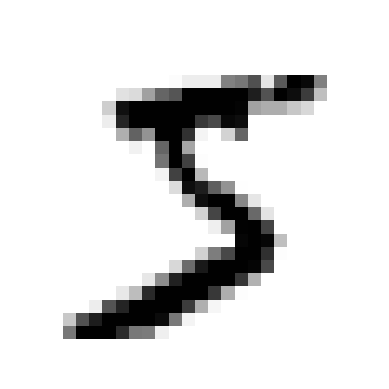

In [4]:
X_train_1d=(x_train[0].reshape(28,28))
plt.imshow(X_train_1d, cmap=plt.cm.binary)
plt.axis('off')
plt.show()



reshaping into 1 d array

In [5]:
x_train2= x_train.reshape((-1,784))
x_test2=x_test.reshape((-1,784))

knn for single label but multiclass


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
model1= KNeighborsClassifier().fit(x_train2, y_train)
y_predict1= model1.predict(x_test2)
metrics.accuracy_score(y_test,y_predict1 )


0.9688

knn for multilabel and multiclass 

In [7]:
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel= np.c_[y_train_large, y_train_odd]
y_multilabel
model2= KNeighborsClassifier().fit(x_train2,y_multilabel)
model2.predict(x_test2)
# acc=accuracy_score()

array([[ True,  True],
       [False, False],
       [False,  True],
       ...,
       [False, False],
       [False,  True],
       [False, False]])

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_train_knn_p= cross_val_predict(model2, x_train2, y_multilabel, cv=3) 
f1_score(y_multilabel, y_train_knn_p, average="macro")

0.9764102655606048

Logistic Regression


In [9]:

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression


In [10]:
%%time
# Running logistic regression
m2 = LogisticRegression(max_iter=10).fit(x_train2, y_train)

CPU times: total: 11.9 s
Wall time: 5.79 s


c:\Users\intel\Desktop\UniCourses\ai cep\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Making predictions on test set
m2_pred = m2.predict(x_test2)
print("The accuracy is "+str(metrics.accuracy_score(y_test,m2_pred)*100)+"%")
m2_cmatrix=confusion_matrix(y_test, m2_pred)
print(m2_cmatrix)


The accuracy is 88.88000000000001%
[[ 937    0    6    4    1    8   12    1   11    0]
 [   0 1091    3    9    1    1    5    0   25    0]
 [  15    2  883   14   15    3   28   24   40    8]
 [   7    1   19  876    0   46    8   16   26   11]
 [   2    5    6    1  895    0   17    2    8   46]
 [  15    6    3   37   24  710   20    8   58   11]
 [  17    3    8    2   12   14  889    1   12    0]
 [   4   18   35    3   12    0    2  913    6   35]
 [   6    9   14   30   11   24   16   19  832   13]
 [   7    8   10   10   57   15    1   27   12  862]]


In [17]:
m4 = LogisticRegression(random_state=0, max_iter=10)


In [ ]:
%%time
# Running and testing on output 'large'
m4_large=m4.fit(x_train2, multilabel_train_y['large'])
m4_large_pred = m4_large.predict(test_X2)
print("The accuracy is "+str(metrics.accuracy_score(multilabel_test_y['large'],m4_large_pred)*100)+"%")
m4_large_cmatrix=confusion_matrix(multilabel_test_y['large'],m4_large_pred)
print(m4_large_cmatrix)